In [12]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
seg = torch.rand(127,20)

In [8]:
#Maximum possible length of mask
time_mask_param = 5
#Maximum possible length of mask
freq_mask_param = 30

In [105]:
timeStretch = T.TimeStretch(n_freq=127)
timeMasking = T.TimeMasking(time_mask_param, iid_masks = True)
frequencyMasking = T.FrequencyMasking(freq_mask_param, iid_masks = True)

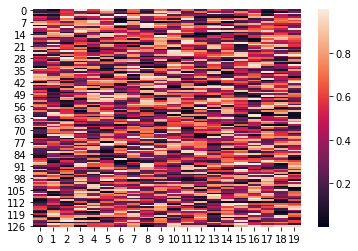

In [13]:
ax = sns.heatmap(seg)

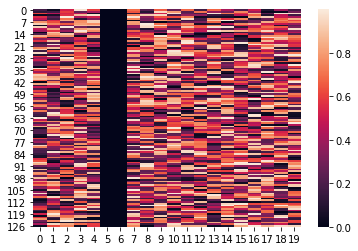

In [18]:
ax = sns.heatmap(timeMasking(seg))

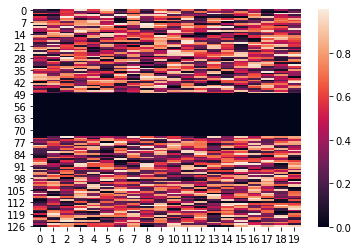

In [19]:
ax = sns.heatmap(frequencyMasking(seg))

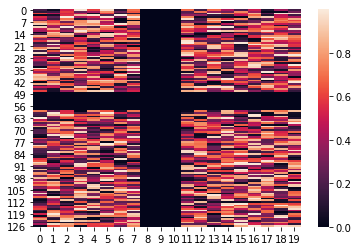

In [32]:
ax = sns.heatmap(frequencyMasking(timeMasking(seg)))

In [38]:
compressed = timeStretch(seg.type(torch.complex64), 0.8)

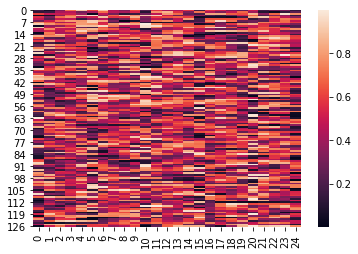

In [46]:
ax = sns.heatmap(compressed.type(torch.double))

In [47]:
compressed = timeStretch(seg.type(torch.complex64), 1.2)

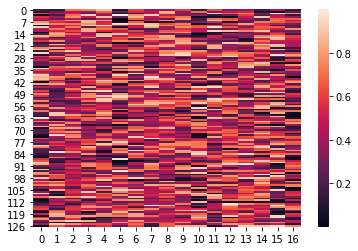

In [48]:
ax = sns.heatmap(compressed.type(torch.double))

In [106]:
#If we just stretch all the samples in a batch equally then it does not matter that we are chaning a dimension!
batch = torch.rand(50,127,20)
batch_time = timeStretch(batch.type(torch.complex64), 0.8).type(torch.double)
batch_time.shape

torch.Size([50, 127, 25])

In [107]:
batch_time = batch_time.reshape((50,1,127,25))
batch_time = frequencyMasking(timeMasking(batch_time))
batch_time = batch_time.reshape(-1,127,25)

In [82]:
#So this is the way if we want separate filterings for each example in the batch!

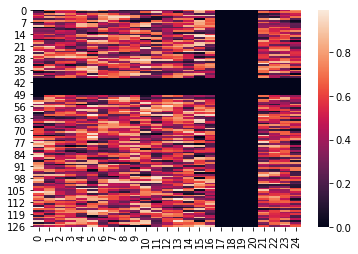

In [108]:
ax = sns.heatmap(batch_time[0])

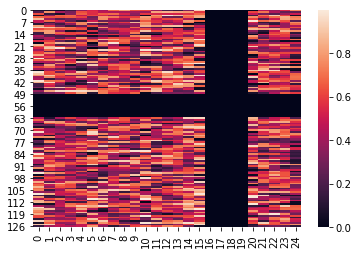

In [109]:
ax = sns.heatmap(batch_time[1])

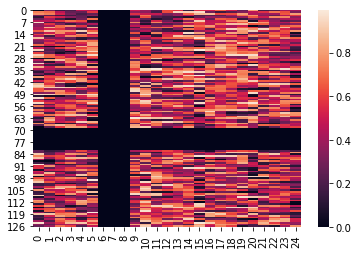

In [110]:
ax = sns.heatmap(batch_time[2])